In [1]:
import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import plotly.express as px
import datetime


Open file

In [2]:

k=pd.read_csv('kasall.csv')
print(k.columns)
kas=DataFrame(k.head(80))
print(kas.head(80))

Index(['Date', 'County', 'Pib', 'Nrfirme', 'AvgSalariatiPers',
       'BiblioteciTotal', 'PersonalAngajatInBiblioteci',
       'CitioriActiviInBiblioteci', 'Cinematografe', 'Locuriincinematografe',
       'SpectatorilaReprezentatii ', 'MuzeeSiColectii ', 'SportiviLegitimati',
       'ValoareSalariuMediu', 'ValoareSalariu   '],
      dtype='object')
          Date  County    Pib  Nrfirme  AvgSalariatiPers  BiblioteciTotal  \
0   12/30/2007  Brasov  13946    19143            163788              227   
1   12/30/2008  Brasov  16857    20287            169429              216   
2   12/30/2009  Brasov  17560    19626            150855              231   
3   12/30/2010  Brasov  17586    17617            145465              218   
4   12/30/2011  Brasov  17674    16209            145274              202   
..         ...     ...    ...      ...               ...              ...   
68  12/30/2014   Ilfov  16957    17490            108343              112   
69  12/30/2015   Ilfov  17181    

Change data types into floats instead of leaving them in int 

In [10]:
kas['Nrfirme']=kas.Nrfirme.astype(float)
kas['Pib']=kas.Pib.astype(float)
kas['AvgSalariatiPers']=kas.AvgSalariatiPers.astype(float)
kas['ValoareSalariuMediu']=kas.ValoareSalariuMediu.astype(float)

Parse timeseries 

In [4]:
kas['Date']=pd.to_datetime(kas['Date'], infer_datetime_format=True)
indexeddf=kas.set_index(['Date'])


Parsing to time format and extracting dates with 'Date'

In [5]:
x=kas['Date']=pd.to_datetime(kas['Date'], format='%y-%m-%d')

Day=kas['Date'].dt.day_name()
print(Day)

Month=kas['Date'].dt.month_name()
print(Month)

Year=kas['Date'].dt.year
print(Year)

0        Sunday
1       Tuesday
2     Wednesday
3      Thursday
4        Friday
        ...    
68      Tuesday
69    Wednesday
70       Friday
71     Saturday
72       Sunday
Name: Date, Length: 73, dtype: object
0     December
1     December
2     December
3     December
4     December
        ...   
68    December
69    December
70    December
71    December
72    December
Name: Date, Length: 73, dtype: object
0     2007
1     2008
2     2009
3     2010
4     2011
      ... 
68    2014
69    2015
70    2016
71    2017
72    2018
Name: Date, Length: 73, dtype: int64


Subset timeseries

In [6]:
kas['Year']=kas['Date'].dt.year
kas['Month']=kas['Date'].dt.month_name()
kas['Day']=kas['Date'].dt.day_name()
print(kas.head(80))

         Date  County      Pib  Nrfirme  AvgSalariatiPers  BiblioteciTotal  \
0  2007-12-30  Brasov  13946.0  19143.0          163788.0              227   
1  2008-12-30  Brasov  16857.0  20287.0          169429.0              216   
2  2009-12-30  Brasov  17560.0  19626.0          150855.0              231   
3  2010-12-30  Brasov  17586.0  17617.0          145465.0              218   
4  2011-12-30  Brasov  17674.0  16209.0          145274.0              202   
..        ...     ...      ...      ...               ...              ...   
68 2014-12-30   Ilfov  16957.0  17490.0          108343.0              112   
69 2015-12-30   Ilfov  17181.0  19363.0          116023.0              105   
70 2016-12-30   Ilfov  19132.0  21001.0          128107.0              100   
71 2017-12-30   Ilfov  20501.0  23356.0          137941.0              101   
72 2018-12-30   Ilfov  16210.0      0.0          167718.0               99   

    PersonalAngajatInBiblioteci  CitioriActiviInBiblioteci  Cin

Subplot 

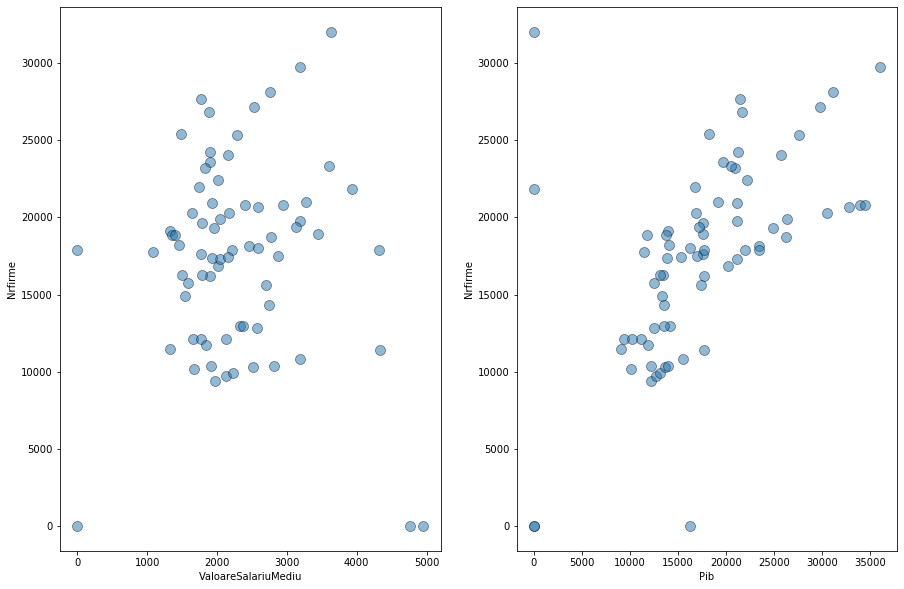

In [7]:
f,axes = plt.subplots(1,2, figsize=(15, 10))
A=sns.scatterplot(kas.ValoareSalariuMediu , kas.Nrfirme , s=100, edgecolor='black', alpha=0.5,\
     palette='husl',ax=axes[0])

B=sns.scatterplot(kas.Pib, kas.Nrfirme, s=100, edgecolor='black', alpha=0.5,\
     palette='husl',ax=axes[1])

plt.show()

Dasboard on  economic charts charts

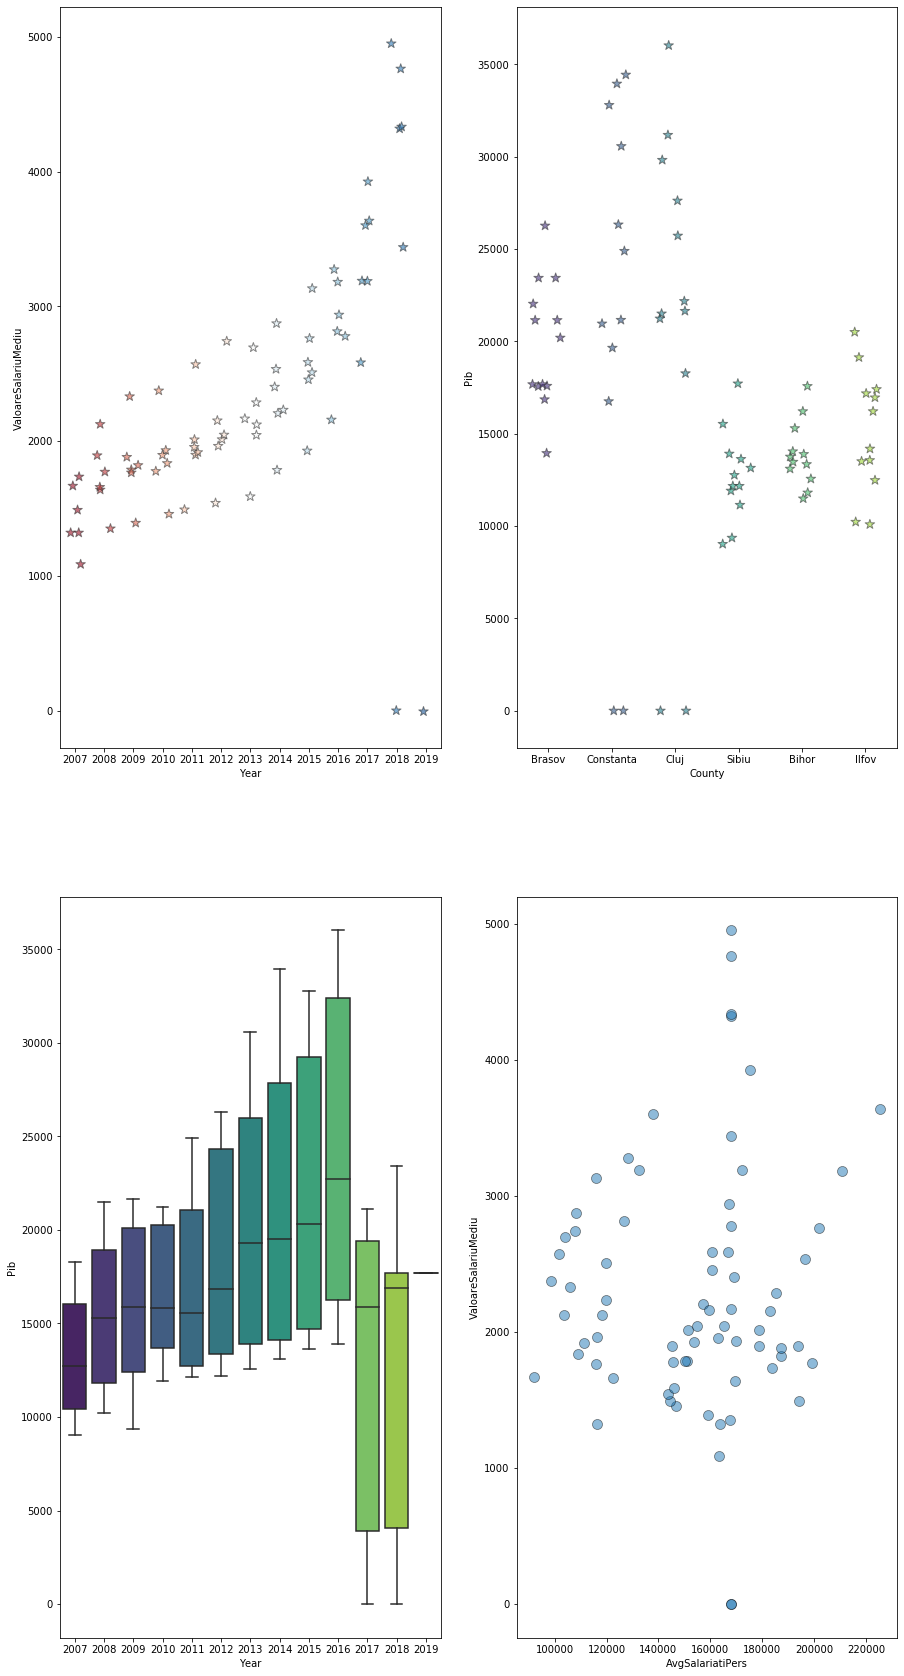

In [18]:
f,axes = plt.subplots(2,2, figsize=(15,30))
x0=sns.stripplot(x='Year', y='ValoareSalariuMediu',jitter=0.25, marker='*',alpha=0.6, size=10, linewidth=1, palette="RdBu", data=kas, \
    ax=axes[0,0])

x1=sns.stripplot(x='County', y='Pib',jitter=0.25, marker='*',alpha=0.6, size=10, linewidth=1, palette="viridis", data=kas, \
    ax=axes[0,1])

x2=sns.boxplot(kas.Year, kas.Pib, palette='viridis',hue_order=[True,False],ax=axes[1,0])

x3=sns.scatterplot(kas.AvgSalariatiPers, kas.ValoareSalariuMediu, s=100, edgecolor='black', alpha=0.5,\
     palette='summer', ax=axes[1,1])

plt.show()

Regression plots

In [23]:
#regression plot
df = px.data.tips()
fig = px.scatter(kas, x="Pib", y="Nrfirme", trendline="ols")
plotly.offline.plot(fig, filename='K')

'K.html'

In [22]:
df = px.data.tips()
fig = px.scatter(kas, x="Nrfirme", y="ValoareSalariuMediu", trendline="ols")
plotly.offline.plot(fig, filename='K')

'K.html'

In [25]:
df = px.data.tips()
fig = px.scatter(kas, x="Nrfirme", y="AvgSalariatiPers", trendline="ols")
plotly.offline.plot(fig, filename='K')

'K.html'

Dasboard on Education charts

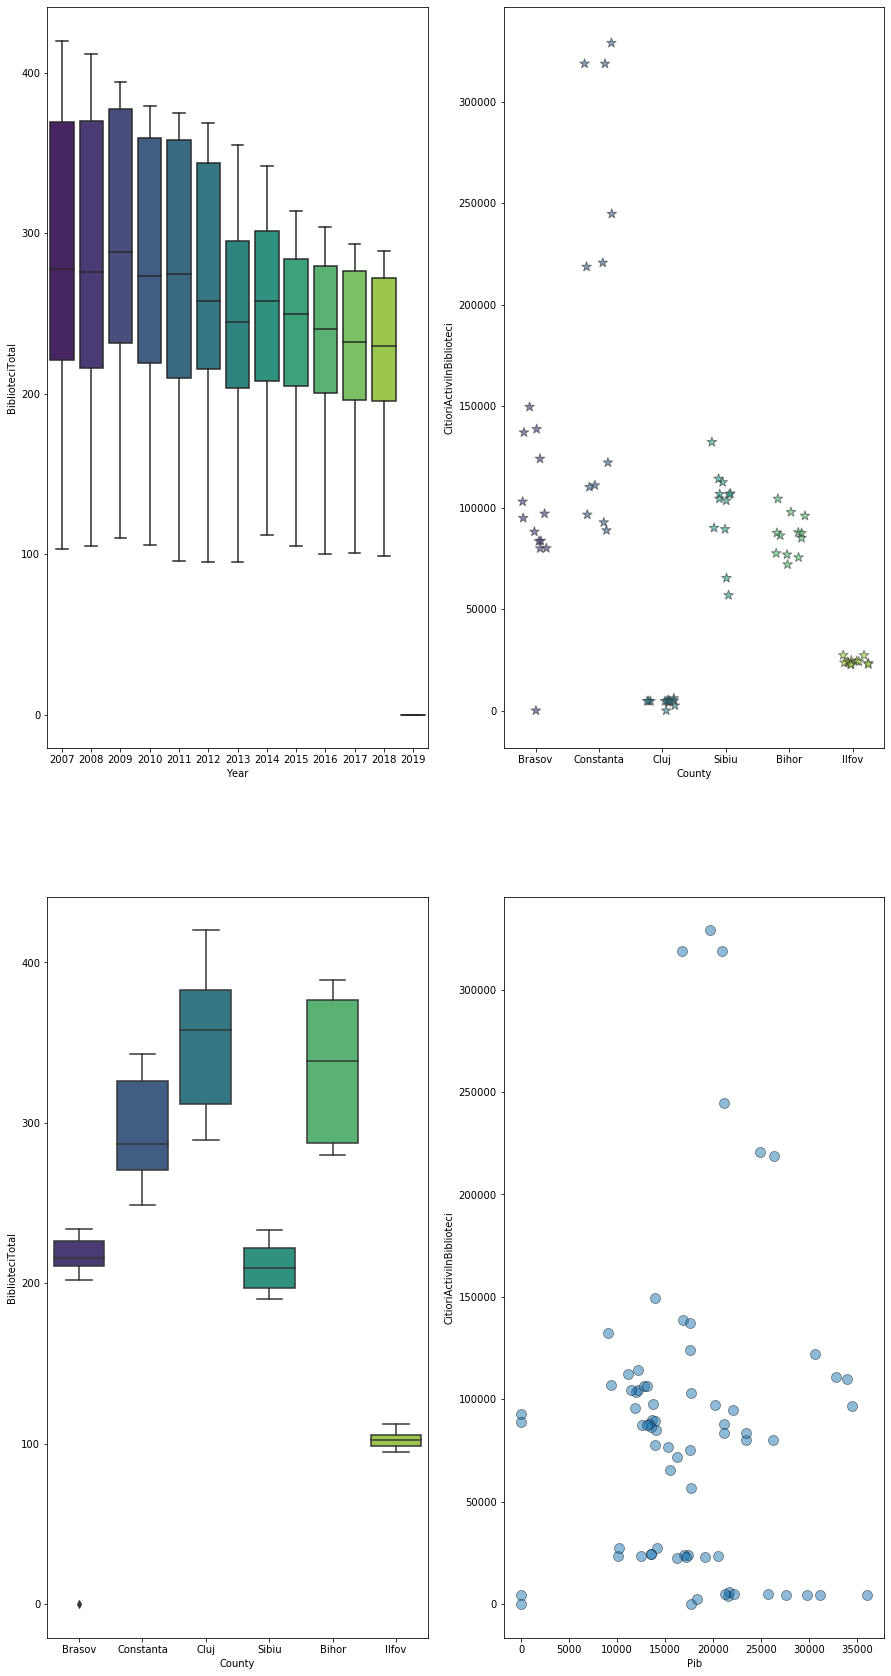

In [19]:
f,axes = plt.subplots(2,2, figsize=(15,30))

x0=sns.boxplot(kas.Year, kas.BiblioteciTotal, palette='viridis',hue_order=[True,False],ax=axes[0,0])

x1=sns.stripplot(x='County', y='CitioriActiviInBiblioteci',jitter=0.25, marker='*',alpha=0.6, size=10, linewidth=1, palette="viridis", data=kas, \
    ax=axes[0,1])

x2=sns.boxplot(kas.County, kas.BiblioteciTotal, palette='viridis',hue_order=[True,False],ax=axes[1,0])

x3=sns.scatterplot(kas.Pib, kas.CitioriActiviInBiblioteci, s=100, edgecolor='black', alpha=0.5,\
     palette='summer', ax=axes[1,1])

plt.show()

The higher the number of libraries the higher the gdb. 
where the gdb is high the number of active readers in libraries is smaller most probabli because the number of workers increases.
Culturally speaking people read when they have time, as reading is a leasure time activity instead of a part of the daily routine. 
Also there are new concepts linked to reading and libraries. Basically bookshops and interactive environments where people sit and read has largely substitued the tradaitionally known library. 
This encourages innovative approaches in increasing level of reading and educating among people. 